In [1]:
#!pip install pyodbc

# 0.0. IMPORTAÇÕES

In [2]:
import pyodbc
import numpy             as np
import pandas            as pd
import seaborn           as sns
import matplotlib.pyplot as plt
sns.set_theme(style='darkgrid')

# 1.0. CONECTANDO AO BANCO DE DADOS

In [3]:
def conect(SERVER, DATABASE):
    # Conecta ao banco de dados. A autenticação utilizada é a do Windows.
    try:
        con = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER='+SERVER+';DATABASE='+DATABASE, trusted_connection='yes')
        cursor = con.cursor()
        return con, cursor
    except Error as e:
        print(f"The error '{e}' occurred")

In [4]:
server = '' # inserir o server 
database = '' # inserir o nome do banco de dados
con, cursor = conect(server,database)

## 2.0. USANDO O PANDAS PARA CONSULTAS SQL

In [5]:
query = ''' SELECT * 
FROM TB_ACT_OLIST_ORDERS AS O
INNER JOIN TB_ACT_OLIST_CUSTOMER AS C
ON O.CUSTOMER_ID = C.CUSTOMER_ID'''
df = pd.read_sql_query(query, con)

In [6]:
df.head(3)

,ORDER_ID,CUSTOMER_ID,ORDER_STATUS,ORDER_PURCHASE_TIMESTAMP,ORDER_APPROVED_AT,ORDER_DELIVERED_CARRIER_DATE,ORDER_DELIVERED_CUSTOMER_DATE,ORDER_ESTIMATED_DELIVERY_DATE,CUSTOMER_ID,CUSTOMER_UNIQUE_ID,CUSTOMER_ZIP_CODE_PREFIX,CUSTOMER_CITY,CUSTOMER_STATE
0,8e6df87600aae0285919b5529f7f0bfd,03b5e23eae0971b9eb46cd97cff21a60,delivered,2017-10-29 21:59:00,2017-10-31 04:15:00,2017-11-01 19:13:00,2017-11-07 22:36:00,2017-11-23,03b5e23eae0971b9eb46cd97cff21a60,bd2c96a76503e424d97c858681ab7cb0,22631,rio de janeiro,RJ
1,bac291727c72229414dc95282651bf0b,2b5603bb4431518dcfe8233705589c71,delivered,2018-03-17 10:32:00,2018-03-17 10:51:00,2018-03-19 21:22:00,2018-03-28 17:04:00,2018-04-05,2b5603bb4431518dcfe8233705589c71,8e59b516ce4d23ed2e581bc130aeb0d3,12090,taubate,SP
2,14b02f2ce3bb9d06412a704cb763eebd,72ff40895c2b5caf624195b25ceb4eeb,delivered,2018-04-07 17:30:00,2018-04-07 17:48:00,2018-04-09 22:35:00,2018-04-13 17:19:00,2018-04-19,72ff40895c2b5caf624195b25ceb4eeb,626887d5ce4ac69f1bde59b971e7907b,13063,campinas,SP


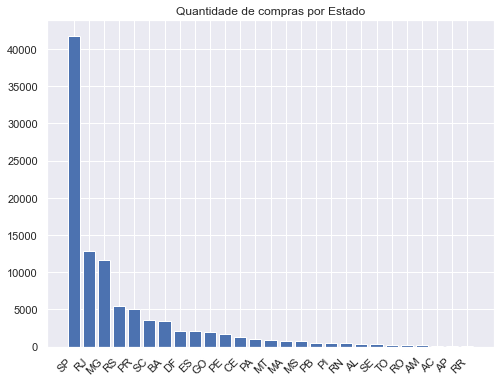

In [7]:
plt.figure(figsize=(8, 6))
plt.title('Quantidade de compras por Estado')
plt.bar(df['CUSTOMER_STATE'].value_counts().index, df['CUSTOMER_STATE'].value_counts())
plt.xticks(rotation=45, ha='right');

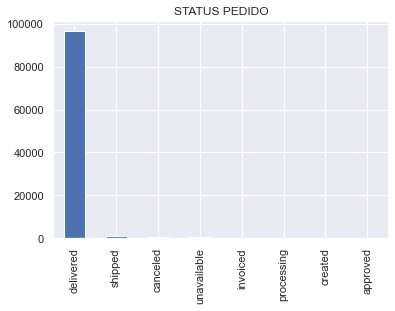

In [8]:
plt.title('STATUS PEDIDO')
df['ORDER_STATUS'].value_counts().plot(kind='bar');

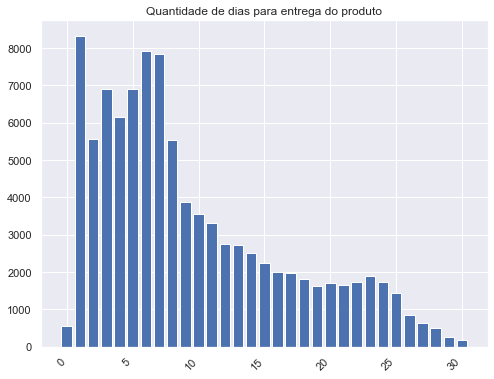

In [9]:
df['tempo_entrega'] = np.absolute((df['ORDER_DELIVERED_CUSTOMER_DATE'].dt.day - df['ORDER_DELIVERED_CARRIER_DATE'].dt.day))
plt.figure(figsize=(8, 6))
plt.title('Quantidade de dias para entrega do produto')
plt.bar(df['tempo_entrega'].value_counts().index, df['tempo_entrega'].value_counts())
plt.xticks(rotation=45, ha='right');

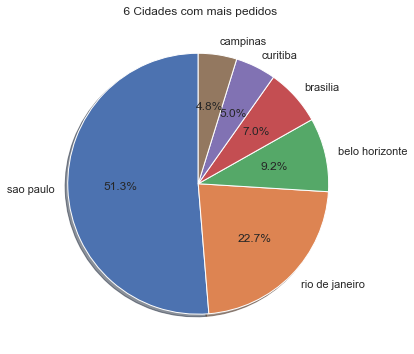

In [10]:
plt.figure(figsize=(15,6))
plt.title(' 6 Cidades com mais pedidos')
plt.pie(
    df['CUSTOMER_CITY'].value_counts().head(6),
    labels = df['CUSTOMER_CITY'].value_counts().head(6).keys(),
    shadow=True,
    startangle=90,
    autopct='%1.1f%%'
);

In [11]:
df['Year'] = df['ORDER_APPROVED_AT'].dt.year
df['Month'] = df['ORDER_APPROVED_AT'].dt.month
df['Day'] = df['ORDER_APPROVED_AT'].dt.day

In [12]:
df['ORDER_PURCHASE_TIMESTAMP'] = df['ORDER_PURCHASE_TIMESTAMP'].dt.date

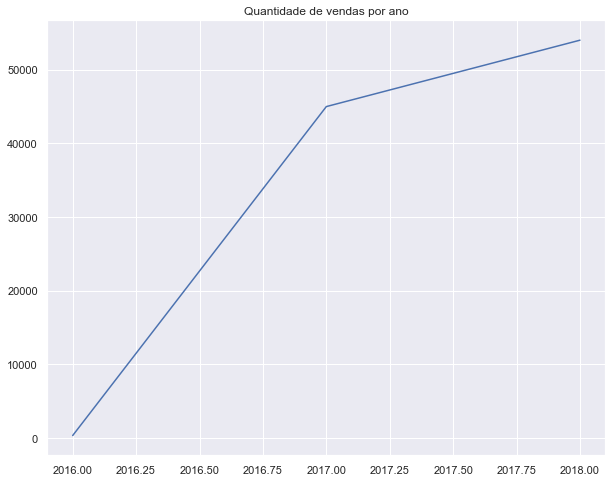

In [13]:
plt.figure(figsize=(10, 8))
plt.title('Quantidade de vendas por ano')
plt.plot(df['Year'].value_counts(ascending=True).index, df['Year'].value_counts(ascending=True));

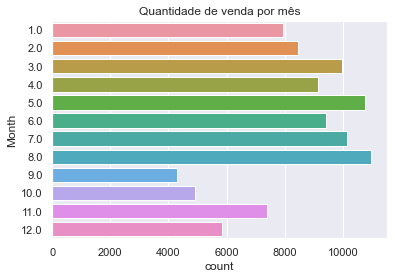

In [14]:
plt.title('Quantidade de venda por mês')
sns.countplot(y='Month', data=df)
plt.show()

In [15]:
query = '''
SELECT * 
FROM TB_ACT_OLIST_PRODUCTS AS A
INNER JOIN TB_ACT_OLIST_ORDER_ITEMS AS I
on A.PRODUCT_ID = I.PRODUCT_ID;

'''

df1 = pd.read_sql_query(query, con)
df1.head(3)

,PRODUCT_ID,PRODUCT_CATEGORY_NAME,PRODUCT_NAME_LENGHT,PRODUCT_DESCRIPTION_LENGHT,PRODUCT_PHOTOS_QTY,PRODUCT_WEIGHT_G,PRODUCT_LENGHT_CM,PRODUCT_HEIGHT_CM,PRODUCT_WIDTH_CM,ORDER_ID,ORDER_ITEM_ID,PRODUCT_ID,SELLER_ID,SHIPPING_LIMIT_DATE,PRICE,FREIGHT_VALUE
0,0d146484c69d613fe015c0229056b065,moveis_decoracao,24,458,4,100,80,10,60,4f13ee1d03583de54e86a2e4f640d0f2,2,0d146484c69d613fe015c0229056b065,d20b021d3efdf267a402c402a48ea64b,2017-05-03 09:33:00,10.90,14.52
1,d69b7880f262ed14de5f8149d2f0931d,fashion_bolsas_e_acessorios,53,1434,1,4600,16,2,11,4f1482e926881ff58f7384a6e6bd0771,1,d69b7880f262ed14de5f8149d2f0931d,e5a3438891c0bfdb9394643f95273d8e,2018-02-07 23:50:00,20.30,8.11
2,fef80a5fb121b63bedd4096ff28f6aaa,relogios_presentes,52,567,1,150,20,5,15,4f155f7ed209d3dd23bd51cf0e7a4c03,1,fef80a5fb121b63bedd4096ff28f6aaa,ececbfcff9804a2d6b40f589df8eef2b,2017-06-30 16:23:00,84.99,12.09


In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   PRODUCT_ID                  112650 non-null  object        
 1   PRODUCT_CATEGORY_NAME       112650 non-null  object        
 2   PRODUCT_NAME_LENGHT         112650 non-null  int64         
 3   PRODUCT_DESCRIPTION_LENGHT  112650 non-null  int64         
 4   PRODUCT_PHOTOS_QTY          112650 non-null  int64         
 5   PRODUCT_WEIGHT_G            112650 non-null  int64         
 6   PRODUCT_LENGHT_CM           112650 non-null  int64         
 7   PRODUCT_HEIGHT_CM           112650 non-null  int64         
 8   PRODUCT_WIDTH_CM            112650 non-null  int64         
 9   ORDER_ID                    112650 non-null  object        
 10  ORDER_ITEM_ID               112650 non-null  int64         
 11  PRODUCT_ID                  112650 non-

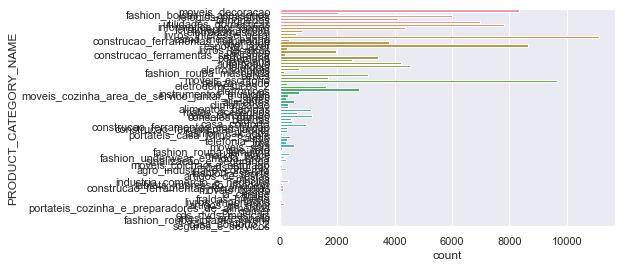

In [17]:
sns.countplot(y='PRODUCT_CATEGORY_NAME', data=df1)
plt.show()

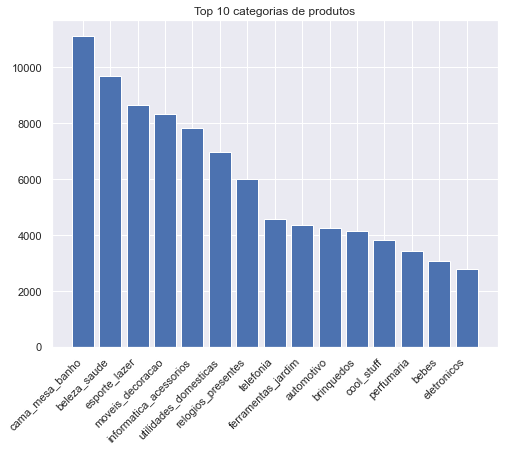

In [18]:
plt.figure(figsize=(8, 6))
plt.title('Top 10 categorias de produtos')
plt.bar(df1['PRODUCT_CATEGORY_NAME'].value_counts().head(15).index, df1['PRODUCT_CATEGORY_NAME'].value_counts().head(15))
plt.xticks(rotation=45, ha='right');

<AxesSubplot:>

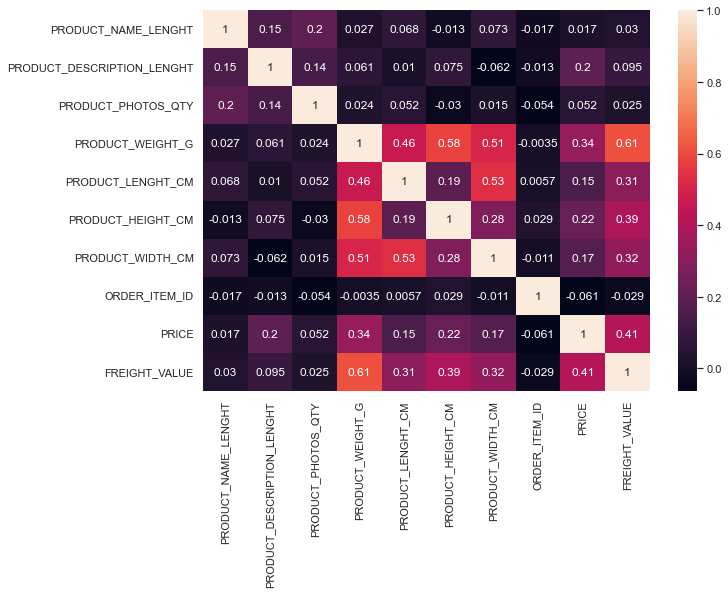

In [19]:
plt.figure(figsize=(10, 7))
sns.heatmap(df1.corr(), annot=True)

O valor do frete tem uma correlação com a altura do produto.

In [20]:
aux = df1[['PRODUCT_NAME_LENGHT','PRODUCT_DESCRIPTION_LENGHT','PRODUCT_WEIGHT_G','PRODUCT_LENGHT_CM','PRODUCT_HEIGHT_CM','PRODUCT_WIDTH_CM','PRICE','FREIGHT_VALUE']]

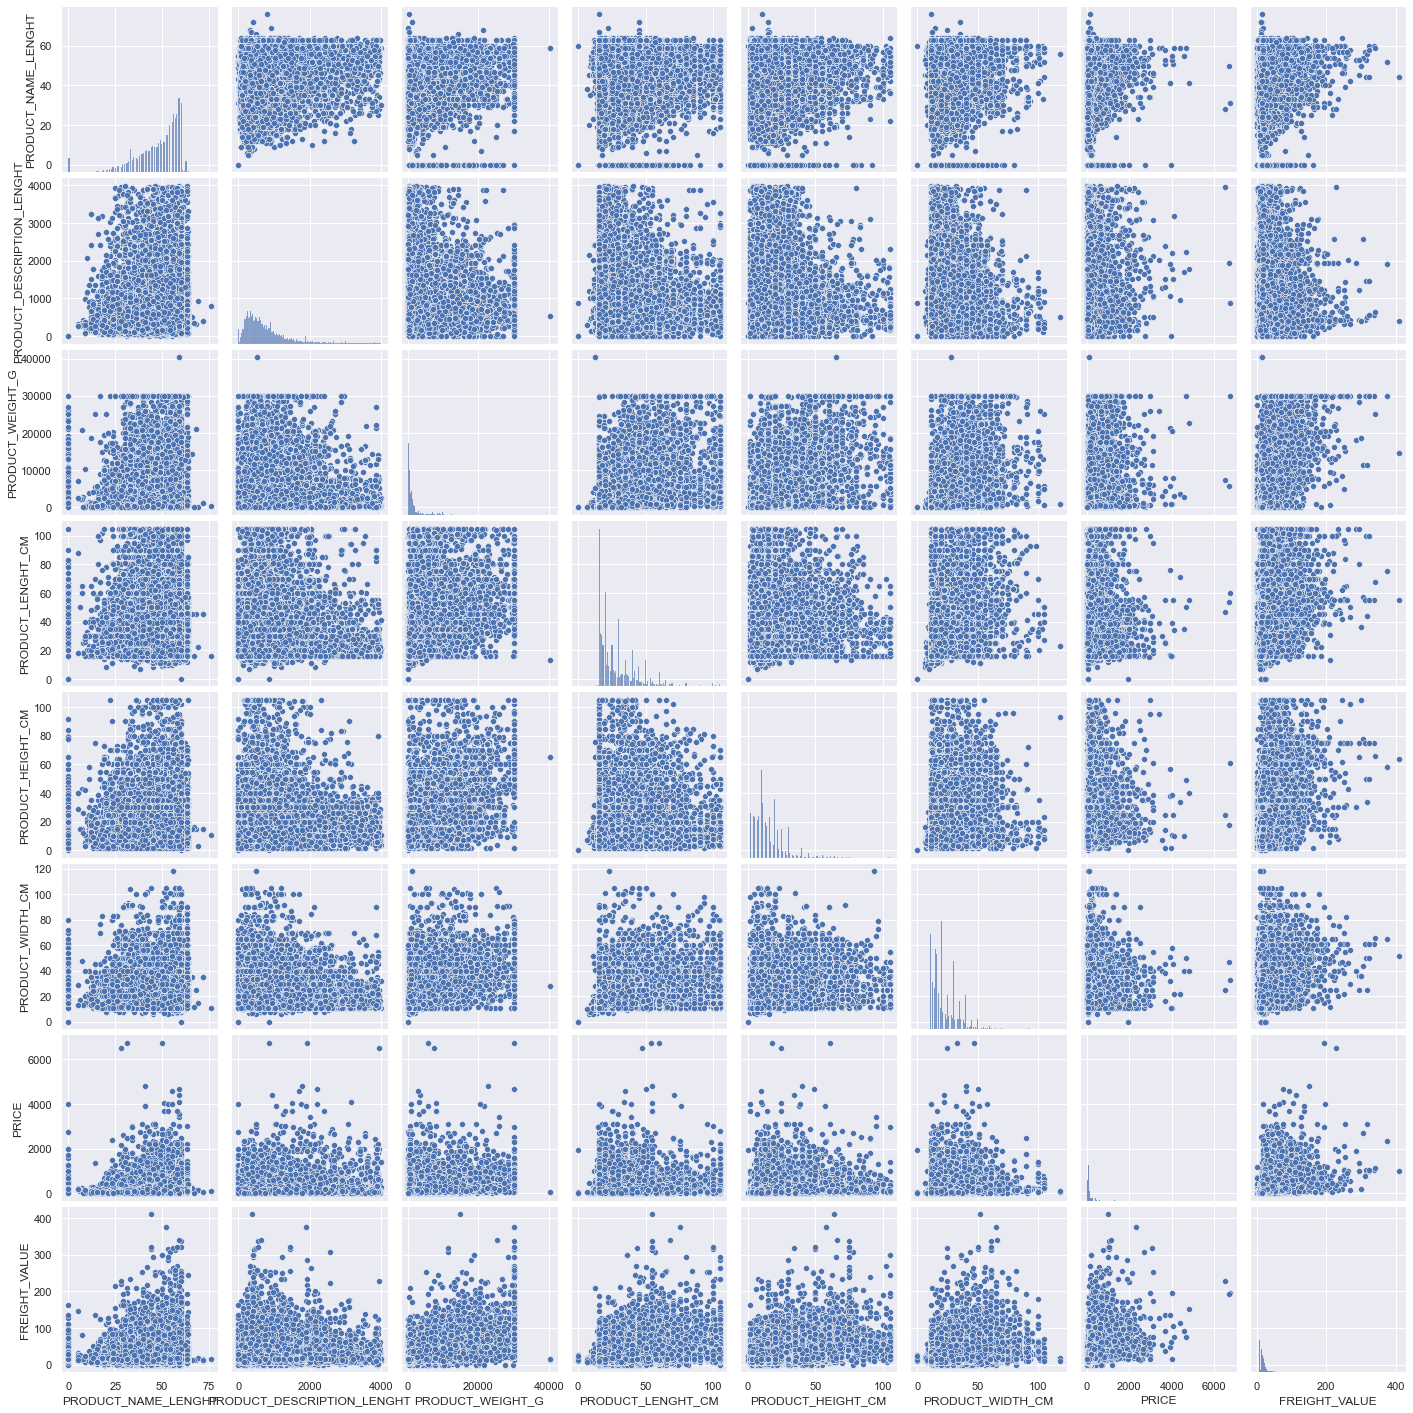

In [21]:
sns.pairplot(aux)
plt.show()

In [22]:
query = '''

SELECT P.*, O.ORDER_ITEM_ID, O.SHIPPING_LIMIT_DATE, O.PRICE, O.FREIGHT_VALUE
FROM TB_ACT_OLIST_ORDER_PAYMENTS AS P
INNER JOIN TB_ACT_OLIST_ORDER_ITEMS AS O
ON P.ORDER_ID = O.ORDER_ID

'''
df2 = pd.read_sql_query(query, con)
df2.head(3)

,ORDER_ID,PAYMENT_SEQUENTIAL,PAYMENT_TYPE,PAYMENT_INSTALLMENTS,PAYMENT_VALUE,ORDER_ITEM_ID,SHIPPING_LIMIT_DATE,PRICE,FREIGHT_VALUE
0,4f13ee1d03583de54e86a2e4f640d0f2,1,credit_card,1,50.84,2,2017-05-03 09:33:00,10.90,14.52
1,4f1482e926881ff58f7384a6e6bd0771,1,credit_card,1,28.41,1,2018-02-07 23:50:00,20.30,8.11
2,4f155f7ed209d3dd23bd51cf0e7a4c03,1,credit_card,4,97.08,1,2017-06-30 16:23:00,84.99,12.09


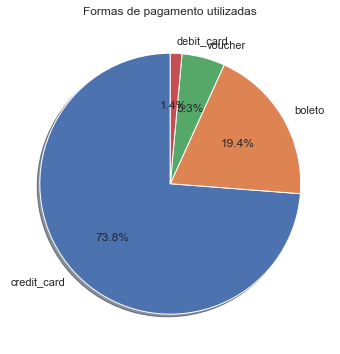

In [23]:
plt.figure(figsize=(15,6))
plt.title('Formas de pagamento utilizadas')
plt.pie(
    df2['PAYMENT_TYPE'].value_counts(),
    labels = df2['PAYMENT_TYPE'].value_counts().keys(),
    shadow=True,
    startangle=90,
    autopct='%1.1f%%'
);

In [24]:
aux = df2.groupby(by=['ORDER_ID']).sum()

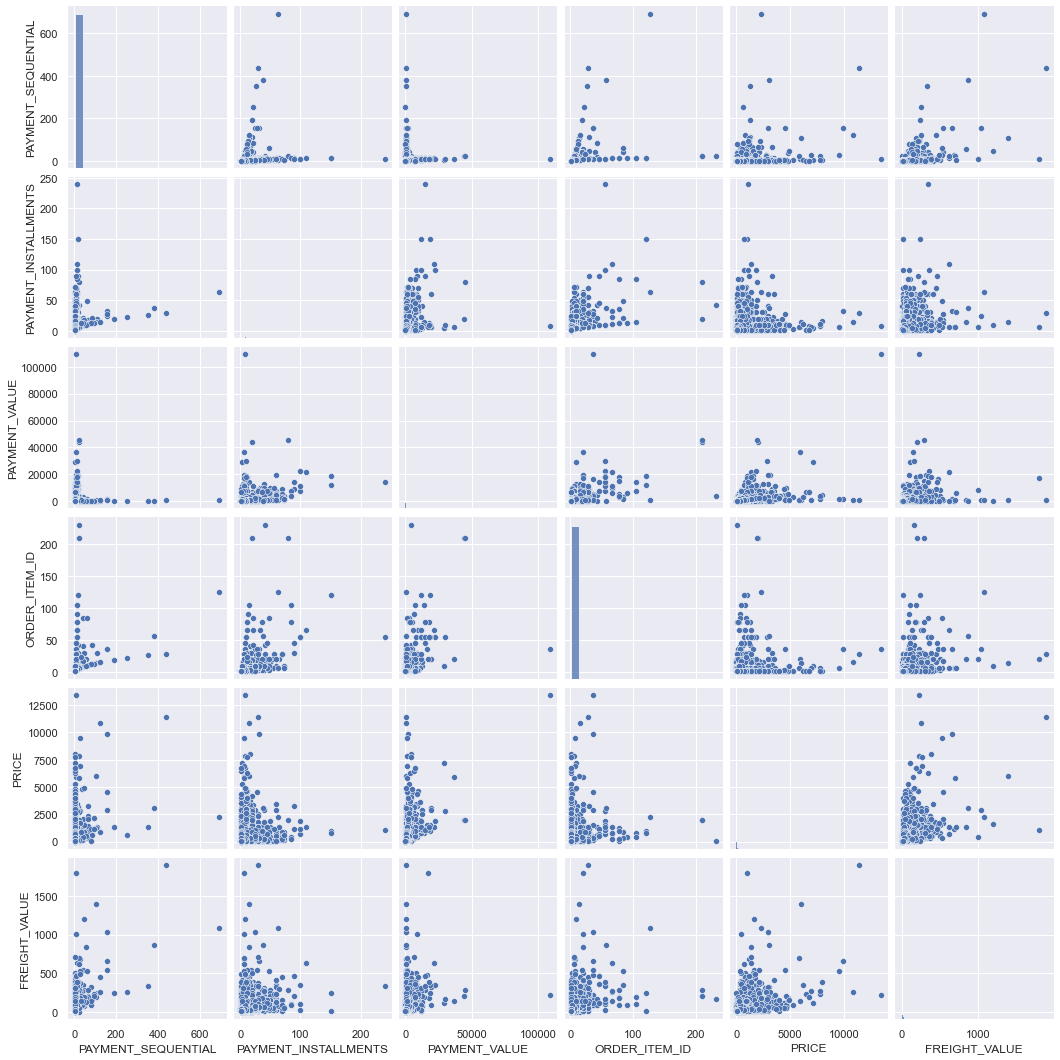

In [25]:
sns.pairplot(aux)
plt.show()